## CODECLAUSE DATASCIENCE INTERNSHIP

## Sentiment Analysis in Movie Reviews

### Yash Chavan

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('IMDB_Reviews.csv')
df

,URL,Title,Release Year,Poster,Genre,Director,Cast,Length,IMDB Rating,Metascore,Votes,Gross,Review Title,Review Text,Rating By User,Review Date,Review Author
0,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"2,267,031",$37.03M,A great movie you can watch again and again,Because you'll probably be confused the first ...,10-Oct,11-Feb-20,Pukeonthestreet
1,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"2,267,031",$37.03M,Superb,"Superb, and truly one of the greatest movies o...",10-Oct,19-Apr-14,grantss
2,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"2,267,031",$37.03M,"Crazy, Cult, Plot Twist, Awesome = Fight Club",I have no words about this film. This is maste...,10-Oct,28-Jul-21,jack_o_hasanov_imdb
3,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"2,267,031",$37.03M,Welcome to movie heaven!,"Let's ignore the advice and talk about ""Fight ...",10-Oct,16-Dec-13,gogoschka-1
4,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"2,267,031",$37.03M,Crazy good,"So rewatchable. The acting is amazing, the sto...",10-Oct,12-Oct-19,trosati-98923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76388,https://www.imdb.com/title/tt0056687/?ref_=ttl...,What Ever Happened to Baby Jane,1962,https://m.media-amazon.com/images/M/MV5BZmI0M2...,"Drama, Horror, Thriller",Robert Aldrich,"['Bette Davis', 'Joan Crawford', 'Victor Buono']",2h 14m,8.0,75.0,"60,552",$4.05M,the two rivals,what ever happened to baby jane was a good ...,NaN,29-Sep-01,BETTEDAVISFAN
76389,https://www.imdb.com/title/tt0056687/?ref_=ttl...,What Ever Happened to Baby Jane,1962,https://m.media-amazon.com/images/M/MV5BZmI0M2...,"Drama, Horror, Thriller",Robert Aldrich,"['Bette Davis', 'Joan Crawford', 'Victor Buono']",2h 14m,8.0,75.0,"60,552",$4.05M,milestone film,"Great movie, even though it was filmed in b&w,...",10-Oct,13-Jan-04,kelsodog2003
76390,https://www.imdb.com/title/tt0056687/?ref_=ttl...,What Ever Happened to Baby Jane,1962,https://m.media-amazon.com/images/M/MV5BZmI0M2...,"Drama, Horror, Thriller",Robert Aldrich,"['Bette Davis', 'Joan Crawford', 'Victor Buono']",2h 14m,8.0,75.0,"60,552",$4.05M,A classic that has worn not so well...,This is still a must see movie for Bette Davis...,10-Jun,22-Jul-18,charliebeaglewoof
76391,https://www.imdb.com/title/tt0056687/?ref_=ttl...,What Ever Happened to Baby Jane,1962,https://m.media-amazon.com/images/M/MV5BZmI0M2...,"Drama, Horror, Thriller",Robert Aldrich,"['Bette Davis', 'Joan Crawford', 'Victor Buono']",2h 14m,8.0,75.0,"60,552",$4.05M,Whatever Happened To Baby Jane (1962),I love this movie great character work by Craw...,10-Oct,18-Aug-23,summerstager


In [10]:
df.head()

,URL,Title,Release Year,Poster,Genre,Director,Cast,Length,IMDB Rating,Metascore,Votes,Gross,Review Title,Review Text,Rating By User,Review Date,Review Author
0,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"2,267,031",$37.03M,A great movie you can watch again and again,Because you'll probably be confused the first ...,10-Oct,11-Feb-20,Pukeonthestreet
1,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"2,267,031",$37.03M,Superb,"Superb, and truly one of the greatest movies o...",10-Oct,19-Apr-14,grantss
2,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"2,267,031",$37.03M,"Crazy, Cult, Plot Twist, Awesome = Fight Club",I have no words about this film. This is maste...,10-Oct,28-Jul-21,jack_o_hasanov_imdb
3,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"2,267,031",$37.03M,Welcome to movie heaven!,"Let's ignore the advice and talk about ""Fight ...",10-Oct,16-Dec-13,gogoschka-1
4,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"2,267,031",$37.03M,Crazy good,"So rewatchable. The acting is amazing, the sto...",10-Oct,12-Oct-19,trosati-98923


In [11]:
df.shape

(76393, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76393 entries, 0 to 76392
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   URL             76393 non-null  object 
 1   Title           76393 non-null  object 
 2   Release Year    76393 non-null  int64  
 3   Poster          76393 non-null  object 
 4   Genre           76393 non-null  object 
 5   Director        75474 non-null  object 
 6   Cast            75194 non-null  object 
 7   Length          75474 non-null  object 
 8   IMDB Rating     76393 non-null  float64
 9   Metascore       75688 non-null  float64
 10  Votes           76393 non-null  object 
 11  Gross           76393 non-null  object 
 12  Review Title    76393 non-null  object 
 13  Review Text     76393 non-null  object 
 14  Rating By User  68358 non-null  object 
 15  Review Date     76393 non-null  object 
 16  Review Author   76393 non-null  object 
dtypes: float64(2), int64(1), object

In [13]:
df.describe()

,Release Year,IMDB Rating,Metascore
count,76393.000000,76393.000000,75688.000000
mean,2000.770804,7.949838,78.410633
std,13.992129,0.498210,11.392822
min,1953.000000,6.500000,41.000000
25%,1997.000000,7.600000,72.000000
50%,2002.000000,7.900000,80.000000
75%,2011.000000,8.400000,87.000000
max,2020.000000,9.300000,96.000000


In [14]:
#drop the irrelevant colums

In [15]:
df.drop(['Release Year', 'URL', 'Poster', 'Cast', 'Length'],
        axis=1,
        inplace=True)

In [16]:
df

,Title,Genre,Director,IMDB Rating,Metascore,Votes,Gross,Review Title,Review Text,Rating By User,Review Date,Review Author
0,Fight Club,Drama,David Fincher,8.8,67.0,"2,267,031",$37.03M,A great movie you can watch again and again,Because you'll probably be confused the first ...,10-Oct,11-Feb-20,Pukeonthestreet
1,Fight Club,Drama,David Fincher,8.8,67.0,"2,267,031",$37.03M,Superb,"Superb, and truly one of the greatest movies o...",10-Oct,19-Apr-14,grantss
2,Fight Club,Drama,David Fincher,8.8,67.0,"2,267,031",$37.03M,"Crazy, Cult, Plot Twist, Awesome = Fight Club",I have no words about this film. This is maste...,10-Oct,28-Jul-21,jack_o_hasanov_imdb
3,Fight Club,Drama,David Fincher,8.8,67.0,"2,267,031",$37.03M,Welcome to movie heaven!,"Let's ignore the advice and talk about ""Fight ...",10-Oct,16-Dec-13,gogoschka-1
4,Fight Club,Drama,David Fincher,8.8,67.0,"2,267,031",$37.03M,Crazy good,"So rewatchable. The acting is amazing, the sto...",10-Oct,12-Oct-19,trosati-98923
...,...,...,...,...,...,...,...,...,...,...,...,...
76388,What Ever Happened to Baby Jane,"Drama, Horror, Thriller",Robert Aldrich,8.0,75.0,"60,552",$4.05M,the two rivals,what ever happened to baby jane was a good ...,NaN,29-Sep-01,BETTEDAVISFAN
76389,What Ever Happened to Baby Jane,"Drama, Horror, Thriller",Robert Aldrich,8.0,75.0,"60,552",$4.05M,milestone film,"Great movie, even though it was filmed in b&w,...",10-Oct,13-Jan-04,kelsodog2003
76390,What Ever Happened to Baby Jane,"Drama, Horror, Thriller",Robert Aldrich,8.0,75.0,"60,552",$4.05M,A classic that has worn not so well...,This is still a must see movie for Bette Davis...,10-Jun,22-Jul-18,charliebeaglewoof
76391,What Ever Happened to Baby Jane,"Drama, Horror, Thriller",Robert Aldrich,8.0,75.0,"60,552",$4.05M,Whatever Happened To Baby Jane (1962),I love this movie great character work by Craw...,10-Oct,18-Aug-23,summerstager


In [17]:
df = df.dropna()
print("Total missing values: ", len(df))

Total missing values:  66998


In [18]:
df.nunique()

Title               101
Genre                54
Director             68
IMDB Rating          23
Metascore            38
Votes               101
Gross               101
Review Title      59800
Review Text       66982
Rating By User       10
Review Date        9120
Review Author     45436
dtype: int64

In [23]:
floats, objects = [],[]
for col in df.columns:
    if df[col].dtype == object:
        objects.append(col)
    elif df[col].dtype == float:
        floats.append(col)
print(objects)
print(floats)

['Title', 'Genre', 'Director', 'Votes', 'Gross', 'Review Title', 'Review Text', 'Rating By User', 'Review Date', 'Review Author']
['IMDB Rating', 'Metascore']


In [24]:
df['Genre'].value_counts()

Genre
Drama                           7423
Drama, Horror, Mystery          4618
Action, Sci-Fi                  3657
Drama, Sci-Fi, Thriller         3234
Crime, Drama, Thriller          3084
Crime, Drama, Mystery           2915
Mystery, Thriller               2861
Drama, Mystery, Thriller        2421
Crime, Thriller                 2404
Action, Drama, Mystery          2108
Crime, Drama                    2024
Action, Drama, History          2006
Drama, Mystery, Sci-Fi          1531
Adventure, Drama, War           1471
Drama, Western                  1464
Action, Drama, Sci-Fi           1297
Action, Drama                   1245
Horror, Sci-Fi                  1178
Horror, Mystery, Thriller       1175
Comedy, Crime                   1071
Drama, Mystery, War             1000
Comedy, Drama                    961
Drama, Romance, Sci-Fi           957
Drama, Fantasy                   946
Action, Crime, Mystery           902
Comedy, Drama, Romance           873
Biography, Drama, Sport         

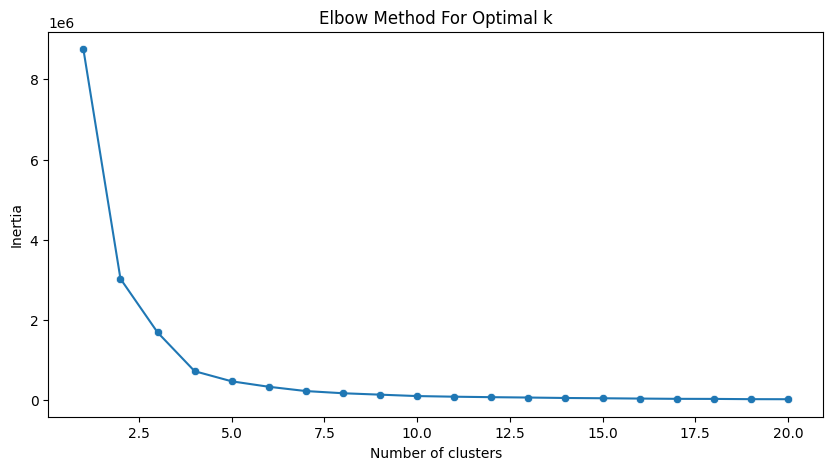

In [35]:
df_numeric = df.select_dtypes(include=[float, int])
error = []
for n_clusters in range(1, 21):
    model = KMeans(init='k-means++',
                   n_clusters=n_clusters,
                   max_iter=500,
                   random_state=22)
    model.fit(df_numeric)
    error.append(model.inertia_)

plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 21), y=error)
sns.scatterplot(x=range(1, 21), y=error)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

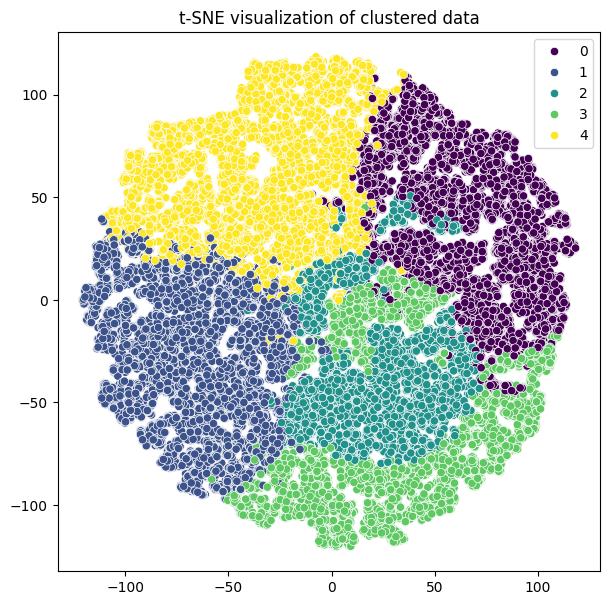

In [43]:
df_encoded = df.copy()
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])

# Fit the KMeans model
model = KMeans(init='k-means++',
               n_clusters=5,
               max_iter=500,
               random_state=22)
segments = model.fit_predict(df_encoded)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=22)
tsne_data = tsne.fit_transform(df_encoded)

# Visualize the clusters
plt.figure(figsize=(7, 7))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=segments, palette='viridis')
plt.title('t-SNE visualization of clustered data')
plt.show()